# 07 Deep Q agent with good hyper-parameters

#### 👉 Let's use a neural network model to approximate the Q function.

#### 👉Neural networks are usually highly-parametric models that are able to fit complex patterns between the input features and the target.

#### 👉 The type of neural network we will use is a Multi Layer Perceptron (MLP).

#### 👉MLPs are stacks of linear models, interleaved with so called activation functions.

![nn](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/images/neural_net.jpg?raw=true)

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
!pip install gymnasium
!pip install gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 8.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/03_cart_pole/notebooks/')  # Add the parent directory to the path

Mounted at /content/drive


## Environment 🌎

In [4]:
import gym
env = gym.make('CartPole-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Hyperparameters

In [5]:
# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.00016151809562265122,
    'discount_factor': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 8,
    'freq_steps_update_target': 10,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 16,
    'nn_hidden_layers': [256, 256],
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.14856584122699473,
    'steps_epsilon_decay': 10000,
}

# Lapadula: New hparams from saved_agents/CartPole-v1/298/hparams.json
hparams = {"learning_rate": 0.00045095481485457226, "discount_factor": 0.99, "batch_size": 16, "memory_size": 100000, "freq_steps_update_target": 10, "n_steps_warm_up_memory": 1000, "freq_steps_train": 8, "n_gradient_steps": 16, "nn_hidden_layers": [256, 256], "max_grad_norm": 1, "normalize_state": False, "epsilon_start": 0.9, "epsilon_end": 0.06286625175600052, "steps_epsilon_decay": 10000}

SEED = 2386916045

## ⚠️ Fix random seeds

In [6]:
from src.utils import set_seed
set_seed(env, SEED)

/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


## Deep Q-Agent

In [7]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


67,586 parameters


## Train the agent 🏋️

In [8]:
from src.loops import train
train(agent, env, n_episodes=200)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|█████████▉| 199/200 [02:52<00:04,  4.39s/it]/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(

100%|██████████| 200/200 [03:10<00:00,  1.05it/s]

Reward mean: 500.00, std: 0.00
Num steps mean: 500.00, std: 0.00


## Evaluate the agent ⏱️

In [9]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|██████████| 1000/1000 [02:08<00:00,  7.81it/s]


In [10]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 500.00, std 0.00


## Let's see how far we got in each attempt

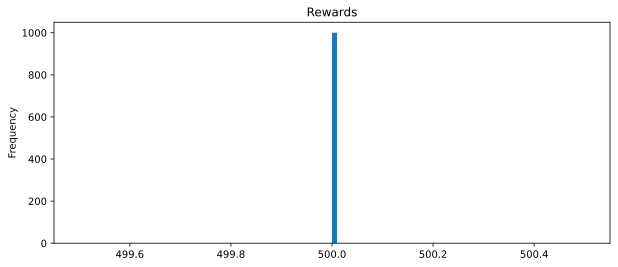

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

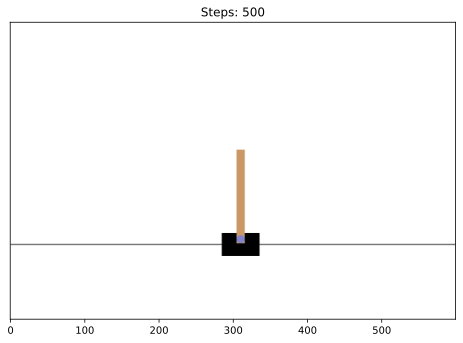

In [12]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

from src.viz import show_video
show_video(agent, env, sleep_sec=0.01, seed=123)